In [49]:
from urllib.request import urlretrieve
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

URL = 'https://raw.githubusercontent.com/knpraveen/VideoGameSales/master/vgsales.csv'

urlretrieve(URL, 'vgsales.csv') 

('vgsales.csv', <http.client.HTTPMessage at 0x7faee7ce5b38>)

In [50]:
# !head vgsales.csv #prints out the csv file

In [51]:
DATA = pd.read_csv('vgsales.csv')
DATA.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


## Display the Number of Video Games Sold from Year (1980 - 2017)

<Container object of 39 artists>

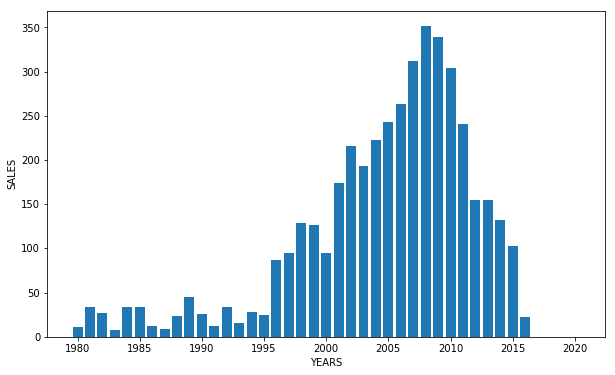

In [52]:
#
YEAR_SALES = DATA[["Year", "NA_Sales"]]
YEAR_SALES.head()

#
total_sales_per_year = YEAR_SALES.groupby(['Year'], sort = False).sum()
#
fig, tys = plt.subplots(figsize=(10,6))
x_axis = total_sales_per_year.index.values
y_axis = total_sales_per_year.NA_Sales
plt.xlabel('YEARS')
plt.ylabel('SALES')
tys.bar(x_axis, y_axis)



# Section 1: Data Cleaning 


In [53]:
df= pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [54]:
dropCol = ['Rank', 'Year', 'EU_Sales', 'JP_Sales',
          'Other_Sales', 'Global_Sales']

df.drop(columns=dropCol, inplace=True, axis=1)
df.head(10)
print(df.head())

                       Name Platform         Genre Publisher  NA_Sales
0                Wii Sports      Wii        Sports  Nintendo     41.49
1         Super Mario Bros.      NES      Platform  Nintendo     29.08
2            Mario Kart Wii      Wii        Racing  Nintendo     15.85
3         Wii Sports Resort      Wii        Sports  Nintendo     15.75
4  Pokemon Red/Pokemon Blue       GB  Role-Playing  Nintendo     11.27


In [55]:
# DataFrame has be updated to remove any video game that has made zero sales in NA

df = df.loc[df['NA_Sales'] != 0]     
df.head(10)


,Name,Platform,Genre,Publisher,NA_Sales
0,Wii Sports,Wii,Sports,Nintendo,41.49
1,Super Mario Bros.,NES,Platform,Nintendo,29.08
2,Mario Kart Wii,Wii,Racing,Nintendo,15.85
3,Wii Sports Resort,Wii,Sports,Nintendo,15.75
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27
5,Tetris,GB,Puzzle,Nintendo,23.20
6,New Super Mario Bros.,DS,Platform,Nintendo,11.38
7,Wii Play,Wii,Misc,Nintendo,14.03
8,New Super Mario Bros. Wii,Wii,Platform,Nintendo,14.59
9,Duck Hunt,NES,Shooter,Nintendo,26.93


<Container object of 25 artists>

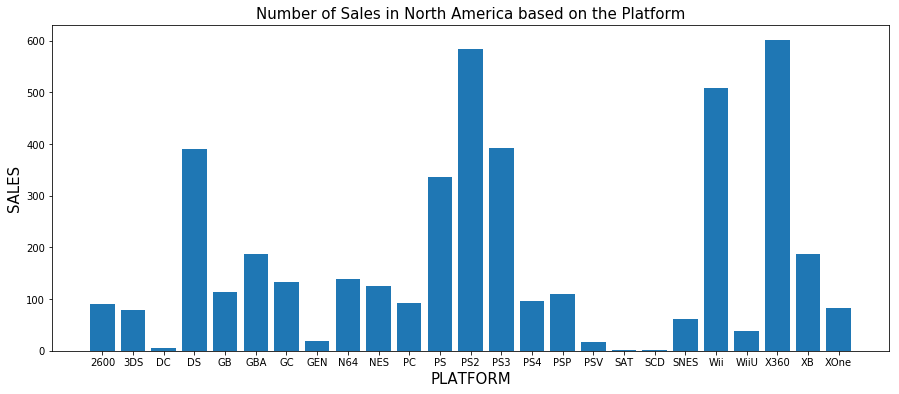

In [56]:
PLATFORM_SALES = df[["Platform", "NA_Sales"]]
PLATFORM_SALES.head()

#
total_sales_per_platform= PLATFORM_SALES.groupby(['Platform'], sort = False).sum()
#
fig, tys = plt.subplots(figsize=(15,6))
x_axis = total_sales_per_platform.index.values
y_axis = total_sales_per_platform.NA_Sales
plt.title('Number of Sales in North America based on the Platform', size=15)
plt.xlabel('PLATFORM', size=15)
plt.ylabel('SALES', size=15)
tys.bar(x_axis, y_axis)

### Logistical Regression OneHotEncoding

In [57]:
ohe_df = pd.get_dummies(df, columns=['Platform','Genre','Publisher'])
ohe_df.head(10)

,Name,NA_Sales,Platform_2600,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,...,Publisher_Xseed Games,Publisher_Yacht Club Games,Publisher_Yuke's,Publisher_Zoo Digital Publishing,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_id Software,Publisher_inXile Entertainment,Publisher_responDESIGN
0,Wii Sports,41.49,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Super Mario Bros.,29.08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Mario Kart Wii,15.85,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Wii Sports Resort,15.75,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Pokemon Red/Pokemon Blue,11.27,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Tetris,23.20,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,New Super Mario Bros.,11.38,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Wii Play,14.03,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,New Super Mario Bros. Wii,14.59,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Duck Hunt,26.93,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
new_features = ['Platform_2600', 'Platform_3DS', 'Platform_DC', 'Platform_DS', 'Platform_GB', 'Platform_GBA', 'Platform_GC', 'Platform_GEN', 'Platform_N64', 'Platform_NES', 'Platform_PC', 'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_PS4', 'Platform_PSP', 'Platform_PSV', 'Platform_SAT', 'Platform_SCD', 'Platform_SNES', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360', 'Platform_XB', 'Platform_XOne', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy', 'Publisher_10TACLE Studios', 'Publisher_1C Company', 'Publisher_20th Century Fox Video Games', 'Publisher_3DO', 'Publisher_505 Games', 'Publisher_5pb', 'Publisher_989 Sports', 'Publisher_989 Studios', 'Publisher_AQ Interactive', 'Publisher_ASC Games', 'Publisher_ASCII Entertainment', 'Publisher_Abylight', 'Publisher_Acclaim Entertainment', 'Publisher_Accolade', 'Publisher_Ackkstudios', 'Publisher_Acquire', 'Publisher_Activision', 'Publisher_Activision Blizzard', 'Publisher_Activision Value', 'Publisher_Adeline Software', 'Publisher_Aerosoft', 'Publisher_Agatsuma Entertainment', 'Publisher_Agetec', 'Publisher_Aksys Games', 'Publisher_Alchemist', 'Publisher_Altron', 'Publisher_American Softworks', 'Publisher_Answer Software', 'Publisher_Aqua Plus', 'Publisher_Arc System Works', 'Publisher_Arena Entertainment', 'Publisher_Arika', 'Publisher_ArtDink', 'Publisher_Aspyr', 'Publisher_Astragon', 'Publisher_Asylum Entertainment', 'Publisher_Atari', 'Publisher_Athena', 'Publisher_Atlus', 'Publisher_Avalon Interactive', 'Publisher_Avanquest', 'Publisher_Avanquest Software', 'Publisher_BAM! Entertainment', 'Publisher_BMG Interactive Entertainment', 'Publisher_Banpresto', 'Publisher_Benesse', 'Publisher_Berkeley', 'Publisher_Bethesda Softworks', 'Publisher_Big Ben Interactive', 'Publisher_Bigben Interactive', 'Publisher_Black Bean Games', 'Publisher_Black Label Games', 'Publisher_Blast! Entertainment Ltd', 'Publisher_Bomb', 'Publisher_Brash Entertainment', 'Publisher_CBS Electronics', 'Publisher_CDV Software Entertainment', 'Publisher_CPG Products', 'Publisher_CTO SpA', 'Publisher_Capcom', 'Publisher_Cave', 'Publisher_ChunSoft', 'Publisher_City Interactive', 'Publisher_Cloud Imperium Games Corporation', 'Publisher_Coconuts Japan', 'Publisher_Codemasters', 'Publisher_CokeM Interactive', 'Publisher_Coleco', 'Publisher_Compile Heart', 'Publisher_Conspiracy Entertainment', 'Publisher_Core Design Ltd.', 'Publisher_Crave Entertainment', 'Publisher_Crystal Dynamics', 'Publisher_Culture Publishers', 'Publisher_CyberFront', 'Publisher_D3Publisher', 'Publisher_DHM Interactive', 'Publisher_DSI Games', 'Publisher_DTP Entertainment', 'Publisher_Data Age', 'Publisher_Data Design Interactive', 'Publisher_Deep Silver', 'Publisher_Destination Software, Inc', 'Publisher_Destineer', 'Publisher_Detn8 Games', 'Publisher_Disney Interactive Studios', 'Publisher_DreamCatcher Interactive', 'Publisher_DreamWorks Interactive', 'Publisher_Dusenberry Martin Racing', 'Publisher_EA Games', 'Publisher_EON Digital Entertainment', 'Publisher_ESP', 'Publisher_Eidos Interactive', 'Publisher_Electronic Arts', 'Publisher_Electronic Arts Victor', 'Publisher_Elite', 'Publisher_Empire Interactive', 'Publisher_Encore', 'Publisher_Enix Corporation', 'Publisher_Enjoy Gaming ltd.', 'Publisher_Enterbrain', 'Publisher_Epic Games', 'Publisher_Ertain', 'Publisher_Essential Games', 'Publisher_Evolved Games', 'Publisher_Extreme Entertainment Group', 'Publisher_Falcom Corporation', 'Publisher_Flashpoint Games', 'Publisher_Focus Home Interactive', 'Publisher_Foreign Media Games', 'Publisher_Fox Interactive', 'Publisher_From Software', 'Publisher_FuRyu', 'Publisher_FuRyu Corporation', 'Publisher_FunSoft', 'Publisher_Funbox Media', 'Publisher_Funcom', 'Publisher_Funsta', 'Publisher_GSP', 'Publisher_GT Interactive', 'Publisher_Game Factory', 'Publisher_Game Life', 'Publisher_GameMill Entertainment', 'Publisher_GameTek', 'Publisher_Gamebridge', 'Publisher_Gamecock', 'Publisher_Gameloft', 'Publisher_Gathering of Developers', 'Publisher_Genki', 'Publisher_Ghostlight', 'Publisher_Global A Entertainment', 'Publisher_Global Star', 'Publisher_Gotham Games', 'Publisher_Graffiti', 'Publisher_Gremlin Interactive Ltd', 'Publisher_Griffin International', 'Publisher_Groove Games', 'Publisher_GungHo', 'Publisher_Gust', 'Publisher_HAL Laboratory', 'Publisher_Hamster Corporation', 'Publisher_Harmonix Music Systems', 'Publisher_Hasbro Interactive', 'Publisher_Havas Interactive', 'Publisher_Hello Games', 'Publisher_Her Interactive', 'Publisher_Hip Interactive', 'Publisher_Home Entertainment Suppliers', 'Publisher_Hudson Entertainment', 'Publisher_Hudson Soft', 'Publisher_Human Entertainment', 'Publisher_ITT Family Games', 'Publisher_Iceberg Interactive', 'Publisher_Idea Factory', 'Publisher_Idea Factory International', 'Publisher_Ignition Entertainment', 'Publisher_Illusion Softworks', 'Publisher_Imagic', 'Publisher_Imagineer', 'Publisher_Indie Games', 'Publisher_Infogrames', 'Publisher_Insomniac Games', 'Publisher_Interplay', 'Publisher_Interplay Productions', 'Publisher_Interworks Unlimited, Inc.', 'Publisher_Introversion Software', 'Publisher_Irem Software Engineering', 'Publisher_Ivolgamus', 'Publisher_JVC', 'Publisher_Jack of All Games', 'Publisher_Jaleco', 'Publisher_Jester Interactive', 'Publisher_JoWood Productions', 'Publisher_Kadokawa Shoten', 'Publisher_Kalypso Media', 'Publisher_Kando Games', 'Publisher_Kemco', 'Publisher_Knowledge Adventure', 'Publisher_Koch Media', 'Publisher_Kokopeli Digital Studios', 'Publisher_Konami Digital Entertainment', 'Publisher_Kool Kizz', 'Publisher_LEGO Media', 'Publisher_LSP Games', 'Publisher_Laguna', 'Publisher_Legacy Interactive', 'Publisher_Level 5', 'Publisher_Lexicon Entertainment', 'Publisher_Liquid Games', 'Publisher_Little Orbit', 'Publisher_LucasArts', 'Publisher_MC2 Entertainment', 'Publisher_MLB.com', 'Publisher_MTV Games', 'Publisher_Mad Catz', 'Publisher_Magical Company', 'Publisher_Magix', 'Publisher_Majesco Entertainment', 'Publisher_Marvelous Entertainment', 'Publisher_Marvelous Interactive', 'Publisher_Masque Publishing', 'Publisher_Mastertronic', 'Publisher_Mastiff', 'Publisher_Mattel Interactive', 'Publisher_Max Five', 'Publisher_Maximum Family Games', 'Publisher_Maxis', 'Publisher_Media Rings', 'Publisher_MediaQuest', 'Publisher_Men-A-Vision', 'Publisher_Mentor Interactive', 'Publisher_Mercury Games', 'Publisher_Metro 3D', 'Publisher_Microids', 'Publisher_Microprose', 'Publisher_Microsoft Game Studios', 'Publisher_Midas Interactive Entertainment', 'Publisher_Midway Games', 'Publisher_Milestone', 'Publisher_Milestone S.r.l.', 'Publisher_Mindscape', 'Publisher_Mitsui', 'Publisher_Mojang', 'Publisher_Moss', 'Publisher_Mud Duck Productions', 'Publisher_Mumbo Jumbo', 'Publisher_Myelin Media', 'Publisher_Mystique', 'Publisher_NCSoft', 'Publisher_NDA Productions', 'Publisher_Namco Bandai Games', 'Publisher_Natsume', 'Publisher_Navarre Corp', 'Publisher_Neko Entertainment', 'Publisher_New World Computing', 'Publisher_NewKidCo', 'Publisher_Nihon Falcom Corporation', 'Publisher_Nintendo', 'Publisher_Nippon Ichi Software', 'Publisher_Nobilis', 'Publisher_Nordcurrent', 'Publisher_Nordic Games', 'Publisher_NovaLogic', 'Publisher_O-Games', 'Publisher_O3 Entertainment', 'Publisher_Ocean', 'Publisher_On Demand', 'Publisher_Origin Systems', 'Publisher_Oxygen Interactive', 'Publisher_P2 Games', 'Publisher_PM Studios', 'Publisher_PQube', 'Publisher_Pacific Century Cyber Works', 'Publisher_Pack In Soft', 'Publisher_Palcom', 'Publisher_Panther Software', 'Publisher_Paradox Interactive', 'Publisher_Parker Bros.', 'Publisher_Performance Designed Products', 'Publisher_Phantagram', 'Publisher_Phantom EFX', 'Publisher_Phenomedia', 'Publisher_Phoenix Games', 'Publisher_Pioneer LDC', 'Publisher_Play It', 'Publisher_PlayV', 'Publisher_Playlogic Game Factory', 'Publisher_Playmates', 'Publisher_Pony Canyon', 'Publisher_PopCap Games', 'Publisher_PopTop Software', 'Publisher_Popcorn Arcade', 'Publisher_Psygnosis', 'Publisher_Quelle', 'Publisher_RTL', 'Publisher_Rage Software', 'Publisher_Rebellion', 'Publisher_Rebellion Developments', 'Publisher_Red Orb', 'Publisher_Red Storm Entertainment', 'Publisher_RedOctane', 'Publisher_Reef Entertainment', 'Publisher_Rising Star Games', 'Publisher_Rondomedia', 'Publisher_SCi', 'Publisher_SNK', 'Publisher_SNK Playmore', 'Publisher_SPS', 'Publisher_SSI', 'Publisher_Sammy Corporation', 'Publisher_Saurus', 'Publisher_Scholastic Inc.', 'Publisher_Screenlife', 'Publisher_Sears', 'Publisher_Sega', 'Publisher_Simon & Schuster Interactive', 'Publisher_Slightly Mad Studios', 'Publisher_Slitherine Software', 'Publisher_Sold Out', 'Publisher_Sony Computer Entertainment', 'Publisher_Sony Computer Entertainment America', 'Publisher_Sony Computer Entertainment Europe', 'Publisher_Sony Online Entertainment', 'Publisher_SouthPeak Games', 'Publisher_Spike', 'Publisher_Square', 'Publisher_Square EA', 'Publisher_Square Enix', 'Publisher_SquareSoft', 'Publisher_Stainless Games', 'Publisher_Starfish', 'Publisher_Starpath Corp.', 'Publisher_Sting', 'Publisher_Storm City Games', 'Publisher_Success', 'Publisher_Summitsoft', 'Publisher_Sunsoft', 'Publisher_Swing! Entertainment', 'Publisher_Syscom', 'Publisher_System 3', 'Publisher_System 3 Arcade Software', 'Publisher_TDK Core', 'Publisher_TDK Mediactive', 'Publisher_THQ', 'Publisher_TYO', 'Publisher_Taito', 'Publisher_Takara', 'Publisher_Takara Tomy', 'Publisher_Take-Two Interactive', 'Publisher_TalonSoft', 'Publisher_TechnoSoft', 'Publisher_Tecmo Koei', 'Publisher_Telegames', 'Publisher_Telltale Games', 'Publisher_Telstar', 'Publisher_Tetris Online', 'Publisher_The Adventure Company', 'Publisher_The Learning Company', 'Publisher_Tigervision', 'Publisher_Time Warner Interactive', 'Publisher_Titus', 'Publisher_Tivola', 'Publisher_Tommo', 'Publisher_Tomy Corporation', 'Publisher_Touchstone', 
                'Publisher_Tradewest', 'Publisher_Trion Worlds', 'Publisher_Tripwire Interactive', 'Publisher_Tru Blu Entertainment', 'Publisher_U.S. Gold', 'Publisher_UEP Systems', 'Publisher_UFO Interactive', 'Publisher_Ubisoft', 'Publisher_Ubisoft Annecy', 'Publisher_Ultravision', 'Publisher_Universal Gamex', 'Publisher_Universal Interactive', 'Publisher_Unknown', 'Publisher_Valcon Games', 'Publisher_ValuSoft', 'Publisher_Valve', 'Publisher_Valve Software', 'Publisher_Vatical Entertainment', 'Publisher_Vic Tokai', 'Publisher_Victor Interactive', 'Publisher_Video System', 'Publisher_Vir2L Studios', 'Publisher_Virgin Interactive', 'Publisher_Virtual Play Games', 'Publisher_Visco', 'Publisher_Vivendi Games', 'Publisher_Wanadoo', 'Publisher_Warner Bros. Interactive Entertainment', 'Publisher_WayForward Technologies', 'Publisher_Westwood Studios', 'Publisher_White Park Bay Software', 'Publisher_Wizard Video Games', 'Publisher_XS Games', 'Publisher_Xicat Interactive', 'Publisher_Xing Entertainment', 'Publisher_Xplosiv', 'Publisher_Xseed Games', 'Publisher_Yacht Club Games', "Publisher_Yuke's", 'Publisher_Zoo Digital Publishing', 'Publisher_Zoo Games', 'Publisher_Zushi Games', 'Publisher_bitComposer Games', 'Publisher_id Software', 'Publisher_inXile Entertainment', 'Publisher_responDESIGN']

ohe_X = ohe_df[new_features]

ohe_y = ohe_df['NA_Sales']

OHE_X_train, OHE_X_test, OHE_y_train, OHE_y_test = train_test_split(ohe_X, ohe_y, test_size=0.25, random_state=6)


In [59]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k) 
knn.fit(OHE_X_train,OHE_y_train)
OHE_knn_y_predict = knn.predict(OHE_X_test)
OHE_knn_accuracy = accuracy_score(OHE_y_test, OHE_knn_y_predict)
print("\t\t"+ '\033[1m' + "KNN" )
print("Old:\t\t\tNew:" + '\033[0m')
print( str(accuracy) + "\t" + str(OHE_knn_accuracy))

ValueError: Unknown label type: 'continuous'

In [ ]:
accuracy = accuracy.score(OHE_y_test, predict)

In [ ]:
# ['Platform_2600', 'Platform_3DS', 'Platform_DC', 'Platform_DS', 'Platform_GB',
#                 'Platform_GBA', 'Platform_GC', 'Platform_GEN', 'Platform_N64', 'Platform_NES',
#                 'Platform_PC', 'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_PS4', 
#                 'Platform_PSP', 'Platform_PSV', 'Platform_SAT', 'Platform_SCD', 'Platform_SNES', 
#                 'Platform_Wii', 'Platform_WiiU', 'Platform_X360', 'Platform_XB', 'Platform_XOne', 
#                 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform', 
#                 'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation', 
#                 'Genre_Sports', 'Genre_Strategy', 'Publisher_10TACLE Studios', 'Publisher_1C Company', 
#                 'Publisher_20th Century Fox Video Games', 'Publisher_3DO', 'Publisher_505 Games', 
#                 'Publisher_5pb', 'Publisher_989 Sports', 'Publisher_989 Studios', 'Publisher_AQ Interactive', 
#                 'Publisher_ASC Games', 'Publisher_ASCII Entertainment', 'Publisher_Abylight', 'Publisher_Acclaim Entertainment', 
#                 'Publisher_Accolade', 'Publisher_Ackkstudios', 'Publisher_Acquire', 'Publisher_Activision', 'Publisher_Activision Blizzard', 
#                 'Publisher_Activision Value', 'Publisher_Adeline Software', 'Publisher_Aerosoft', 'Publisher_Agatsuma Entertainment', 'Publisher_Agetec', 
#                 'Publisher_Aksys Games', 'Publisher_Alchemist', 'Publisher_Altron', 'Publisher_American Softworks', 'Publisher_Answer Software', 'Publisher_Aqua Plus', 
#                 'Publisher_Arc System Works', 'Publisher_Arena Entertainment', 'Publisher_Arika', 'Publisher_ArtDink', 'Publisher_Aspyr', 'Publisher_Astragon', 'Publisher_Asylum Entertainment', 
#                 'Publisher_Atari', 'Publisher_Athena', 'Publisher_Atlus', 'Publisher_Avalon Interactive', 'Publisher_Avanquest', 'Publisher_Avanquest Software', 'Publisher_BAM! Entertainment', 
#                 'Publisher_BMG Interactive Entertainment', 'Publisher_Banpresto', 'Publisher_Benesse', 'Publisher_Berkeley', 
#                 'Publisher_Bethesda Softworks', 'Publisher_Big Ben Interactive', 'Publisher_Bigben Interactive', 
#                 'Publisher_Black Bean Games', 'Publisher_Black Label Games', 'Publisher_Blast! Entertainment Ltd', 
#                 'Publisher_Bomb', 'Publisher_Brash Entertainment', 'Publisher_CBS Electronics', 
#                 'Publisher_CDV Software Entertainment', 'Publisher_CPG Products', 'Publisher_CTO SpA', 
#                 'Publisher_Capcom', 'Publisher_Cave', 'Publisher_ChunSoft', 'Publisher_City Interactive', 
#                 'Publisher_Cloud Imperium Games Corporation', 'Publisher_Coconuts Japan', 'Publisher_Codemasters', 
#                 'Publisher_CokeM Interactive', 'Publisher_Coleco', 'Publisher_Compile Heart', 'Publisher_Conspiracy Entertainment', 
#                 'Publisher_Core Design Ltd.', 'Publisher_Crave Entertainment', 'Publisher_Crystal Dynamics', 'Publisher_Culture Publishers', 
#                 'Publisher_CyberFront', 'Publisher_D3Publisher', 'Publisher_DHM Interactive', 'Publisher_DSI Games', 'Publisher_DTP Entertainment', 
#                 'Publisher_Data Age', 'Publisher_Data Design Interactive', 'Publisher_Deep Silver', 'Publisher_Destination Software, Inc', 'Publisher_Destineer', 'Publisher_Detn8 Games', 
#                 'Publisher_Disney Interactive Studios', 'Publisher_DreamCatcher Interactive', 'Publisher_DreamWorks Interactive', 'Publisher_Dusenberry Martin Racing', 
#                 'Publisher_EA Games', 'Publisher_EON Digital Entertainment', 'Publisher_ESP', 'Publisher_Eidos Interactive', 
#                 'Publisher_Electronic Arts', 'Publisher_Electronic Arts Victor', 'Publisher_Elite', 'Publisher_Empire Interactive', 
#                 'Publisher_Encore', 'Publisher_Enix Corporation', 'Publisher_Enjoy Gaming ltd.', 'Publisher_Enterbrain', 
#                 'Publisher_Epic Games', 'Publisher_Ertain', 'Publisher_Essential Games', 'Publisher_Evolved Games', 'Publisher_Extreme Entertainment Group', 
#                 'Publisher_Falcom Corporation', 'Publisher_Flashpoint Games', 'Publisher_Focus Home Interactive', 'Publisher_Foreign Media Games', 
#                 'Publisher_Fox Interactive', 'Publisher_From Software', 'Publisher_FuRyu', 'Publisher_FuRyu Corporation', 'Publisher_FunSoft', 'Publisher_Funbox Media', 
#                 'Publisher_Funcom', 'Publisher_Funsta', 'Publisher_GSP', 'Publisher_GT Interactive', 'Publisher_Game Factory', 'Publisher_Game Life', 'Publisher_GameMill Entertainment', 
#                 'Publisher_GameTek', 'Publisher_Gamebridge', 'Publisher_Gamecock', 'Publisher_Gameloft', 'Publisher_Gathering of Developers', 'Publisher_Genki', 
#                 'Publisher_Ghostlight', 'Publisher_Global A Entertainment', 'Publisher_Global Star', 'Publisher_Gotham Games', 
#                 'Publisher_Graffiti', 'Publisher_Gremlin Interactive Ltd', 'Publisher_Griffin International', 'Publisher_Groove Games', 
#                 'Publisher_GungHo', 'Publisher_Gust', 'Publisher_HAL Laboratory', 'Publisher_Hamster Corporation', 'Publisher_Harmonix Music Systems', 
#                 'Publisher_Hasbro Interactive', 'Publisher_Havas Interactive', 'Publisher_Hello Games', 'Publisher_Her Interactive', 'Publisher_Hip Interactive', 
#                 'Publisher_Home Entertainment Suppliers', 'Publisher_Hudson Entertainment', 'Publisher_Hudson Soft', 'Publisher_Human Entertainment', 'Publisher_ITT Family Games', 
#                 'Publisher_Iceberg Interactive', 'Publisher_Idea Factory', 'Publisher_Idea Factory International', 'Publisher_Ignition Entertainment', 
#                 'Publisher_Illusion Softworks', 'Publisher_Imagic', 'Publisher_Imagineer', 'Publisher_Indie Games', 'Publisher_Infogrames', 
#                 'Publisher_Insomniac Games', 'Publisher_Interplay', 'Publisher_Interplay Productions', 'Publisher_Interworks Unlimited, Inc.', 
#                 'Publisher_Introversion Software', 'Publisher_Irem Software Engineering', 'Publisher_Ivolgamus', 'Publisher_JVC', 'Publisher_Jack of All Games', 'Publisher_Jaleco', 
#                 'Publisher_Jester Interactive', 'Publisher_JoWood Productions', 'Publisher_Kadokawa Shoten', 'Publisher_Kalypso Media', 'Publisher_Kando Games', 
#                 'Publisher_Kemco', 'Publisher_Knowledge Adventure', 'Publisher_Koch Media', 'Publisher_Kokopeli Digital Studios', 'Publisher_Konami Digital Entertainment', 
#                 'Publisher_Kool Kizz', 'Publisher_LEGO Media', 'Publisher_LSP Games', 'Publisher_Laguna', 'Publisher_Legacy Interactive', 
#                 'Publisher_Level 5', 'Publisher_Lexicon Entertainment', 'Publisher_Liquid Games', 'Publisher_Little Orbit', 
#                 'Publisher_LucasArts', 'Publisher_MC2 Entertainment', 'Publisher_MLB.com', 'Publisher_MTV Games', 
#                 'Publisher_Mad Catz', 'Publisher_Magical Company', 'Publisher_Magix', 'Publisher_Majesco Entertainment', 
#                 'Publisher_Marvelous Entertainment', 'Publisher_Marvelous Interactive', 'Publisher_Masque Publishing', 
#                 'Publisher_Mastertronic', 'Publisher_Mastiff', 'Publisher_Mattel Interactive', 'Publisher_Max Five', 'Publisher_Maximum Family Games', 
#                 'Publisher_Maxis', 'Publisher_Media Rings', 'Publisher_MediaQuest', 'Publisher_Men-A-Vision', 
#                 'Publisher_Mentor Interactive', 'Publisher_Mercury Games', 'Publisher_Metro 3D', 'Publisher_Microids', 
#                 'Publisher_Microprose', 'Publisher_Microsoft Game Studios', 'Publisher_Midas Interactive Entertainment', 
#                 'Publisher_Midway Games', 'Publisher_Milestone', 'Publisher_Milestone S.r.l.', 'Publisher_Mindscape', 
#                 'Publisher_Mitsui', 'Publisher_Mojang', 'Publisher_Moss', 'Publisher_Mud Duck Productions', 'Publisher_Mumbo Jumbo', 
#                 'Publisher_Myelin Media', 'Publisher_Mystique', 'Publisher_NCSoft', 'Publisher_NDA Productions', 
#                 'Publisher_Namco Bandai Games', 'Publisher_Natsume', 'Publisher_Navarre Corp', 'Publisher_Neko Entertainment', 
#                 'Publisher_New World Computing', 'Publisher_NewKidCo', 'Publisher_Nihon Falcom Corporation', 'Publisher_Nintendo', 
#                 'Publisher_Nippon Ichi Software', 'Publisher_Nobilis', 'Publisher_Nordcurrent', 'Publisher_Nordic Games', 
#                 'Publisher_NovaLogic', 'Publisher_O-Games', 'Publisher_O3 Entertainment', 'Publisher_Ocean', 'Publisher_On Demand', 
#                 'Publisher_Origin Systems', 'Publisher_Oxygen Interactive', 'Publisher_P2 Games', 'Publisher_PM Studios', 'Publisher_PQube', 
#                 'Publisher_Pacific Century Cyber Works', 'Publisher_Pack In Soft', 'Publisher_Palcom', 'Publisher_Panther Software', 
#                 'Publisher_Paradox Interactive', 'Publisher_Parker Bros.', 'Publisher_Performance Designed Products', 'Publisher_Phantagram', 
#                 'Publisher_Phantom EFX', 'Publisher_Phenomedia', 'Publisher_Phoenix Games', 'Publisher_Pioneer LDC', 'Publisher_Play It', 'Publisher_PlayV', 
#                 'Publisher_Playlogic Game Factory', 'Publisher_Playmates', 'Publisher_Pony Canyon', 'Publisher_PopCap Games', 'Publisher_PopTop Software', 
#                 'Publisher_Popcorn Arcade', 'Publisher_Psygnosis', 'Publisher_Quelle', 'Publisher_RTL', 'Publisher_Rage Software', 
#                 'Publisher_Rebellion', 'Publisher_Rebellion Developments', 'Publisher_Red Orb', 'Publisher_Red Storm Entertainment', 
#                 'Publisher_RedOctane', 'Publisher_Reef Entertainment', 'Publisher_Rising Star Games', 'Publisher_Rondomedia', 'Publisher_SCi', 
#                 'Publisher_SNK', 'Publisher_SNK Playmore', 'Publisher_SPS', 'Publisher_SSI', 'Publisher_Sammy Corporation', 'Publisher_Saurus', 
#                 'Publisher_Scholastic Inc.', 'Publisher_Screenlife', 'Publisher_Sears', 'Publisher_Sega', 'Publisher_Simon & Schuster Interactive', 
#                 'Publisher_Slightly Mad Studios', 'Publisher_Slitherine Software', 'Publisher_Sold Out', 'Publisher_Sony Computer Entertainment', 
#                 'Publisher_Sony Computer Entertainment America', 'Publisher_Sony Computer Entertainment Europe', 'Publisher_Sony Online Entertainment', 
#                 'Publisher_SouthPeak Games', 'Publisher_Spike', 'Publisher_Square', 'Publisher_Square EA', 'Publisher_Square Enix', 'Publisher_SquareSoft', 
#                 'Publisher_Stainless Games', 'Publisher_Starfish', 'Publisher_Starpath Corp.', 'Publisher_Sting', 'Publisher_Storm City Games', 
#                 'Publisher_Success', 'Publisher_Summitsoft', 'Publisher_Sunsoft', 'Publisher_Swing! Entertainment', 'Publisher_Syscom', 'Publisher_System 3', 
#                 'Publisher_System 3 Arcade Software', 'Publisher_TDK Core', 'Publisher_TDK Mediactive', 'Publisher_THQ', 'Publisher_TYO', 'Publisher_Taito', 
#                 'Publisher_Takara', 'Publisher_Takara Tomy', 'Publisher_Take-Two Interactive', 'Publisher_TalonSoft', 
#                 'Publisher_TechnoSoft', 'Publisher_Tecmo Koei', 'Publisher_Telegames', 'Publisher_Telltale Games', 'Publisher_Telstar', 
#                 'Publisher_Tetris Online', 'Publisher_The Adventure Company', 'Publisher_The Learning Company', 'Publisher_Tigervision', 'Publisher_Time Warner Interactive', 
#                 'Publisher_Titus', 'Publisher_Tivola', 'Publisher_Tommo', 'Publisher_Tomy Corporation', 'Publisher_Touchstone', 'Publisher_Tradewest', 'Publisher_Trion Worlds', 
#                 'Publisher_Tripwire Interactive', 'Publisher_Tru Blu Entertainment', 'Publisher_U.S. Gold', 'Publisher_UEP Systems', 'Publisher_UFO Interactive', 'Publisher_Ubisoft', 
#                 'Publisher_Ubisoft Annecy', 'Publisher_Ultravision', 'Publisher_Universal Gamex', 'Publisher_Universal Interactive', 'Publisher_Unknown', 
#                 'Publisher_Valcon Games', 'Publisher_ValuSoft', 'Publisher_Valve', 'Publisher_Valve Software', 'Publisher_Vatical Entertainment', 'Publisher_Vic Tokai', 
#                 'Publisher_Victor Interactive', 'Publisher_Video System', 'Publisher_Vir2L Studios', 'Publisher_Virgin Interactive', 'Publisher_Virtual Play Games', 
#                 'Publisher_Visco', 'Publisher_Vivendi Games', 'Publisher_Wanadoo', 'Publisher_Warner Bros. Interactive Entertainment', 'Publisher_WayForward Technologies', 
#                 'Publisher_Westwood Studios', 'Publisher_White Park Bay Software', 'Publisher_Wizard Video Games', 'Publisher_XS Games', 'Publisher_Xicat Interactive', 'Publisher_Xing Entertainment', 
#                 'Publisher_Xplosiv', 'Publisher_Xseed Games', 'Publisher_Yacht Club Games', "Publisher_Yuke's", 'Publisher_Zoo Digital Publishing', 'Publisher_Zoo Games', 'Publisher_Zushi Games', 
#                 'Publisher_bitComposer Games', 'Publisher_id Software', 'Publisher_inXile Entertainment', 'Publisher_responDESIGN']